# Route Optimisation Algorithm Demonstration

## What this demo covers
This demo showcases some basic variants of the TSP problem. *Important call out*: many real-life applications may not be able to lean on the Google OR Tools library since they may have some incredibly specific constraints, so it may be a case of needing to do some extra bespoke development which will lengthen the delivery cycle. 

In [1]:
import numpy as np
import pandas as pd
from call_funcs import data_generator, distance_finder
from problem_solver import problem_solver
from route_operations import route_cleaner, fetch_route_detail
from plotting_helper import plot_routes

## First Example: simple case - one depot, multiple drivers

This is a relatively simple example, where we just look at getting some drivers from a certain start point to cover a set of calls; no thought towards even distribution of work, etc

In [2]:
engineers = 3
jobs = 12
time_limit = 10

In [3]:
call_locations = data_generator(jobs,200,200)
distance_matrix = distance_finder(call_locations)

In [4]:
call_locations

,index,x,y
0,0,157,136
1,1,186,184
2,2,199,197
3,3,179,19
4,4,143,27
5,5,66,22
6,6,98,149
7,7,102,115
8,8,44,148
9,9,93,128


In [5]:
distance_matrix

[[0, 56, 74, 119, 109, 145, 60, 58, 113, 64, 31, 60],
 [56, 0, 18, 165, 162, 201, 94, 108, 146, 108, 87, 114],
 [74, 18, 0, 179, 178, 219, 111, 127, 162, 126, 105, 133],
 [119, 165, 179, 0, 36, 113, 153, 123, 186, 138, 93, 107],
 [109, 162, 178, 36, 0, 77, 130, 97, 156, 112, 79, 80],
 [145, 201, 219, 113, 77, 0, 130, 99, 127, 109, 116, 88],
 [60, 94, 111, 153, 130, 130, 0, 34, 54, 21, 64, 50],
 [58, 108, 127, 123, 97, 99, 34, 0, 66, 15, 44, 16],
 [113, 146, 162, 186, 156, 127, 54, 66, 0, 52, 110, 80],
 [64, 108, 126, 138, 112, 109, 21, 15, 52, 0, 57, 31],
 [31, 87, 105, 93, 79, 116, 64, 44, 110, 57, 0, 38],
 [60, 114, 133, 107, 80, 88, 50, 16, 80, 31, 38, 0]]

In [6]:
routes = problem_solver(distance_matrix, engineers)

Route for vehicle 0:
 0 ->  6 ->  9 ->  7 ->  5 ->  11 -> 0
Distance of the route: 343m

Route for vehicle 1:
 0 ->  3 ->  4 ->  10 -> 0
Distance of the route: 265m

Route for vehicle 2:
 0 ->  8 ->  2 ->  1 -> 0
Distance of the route: 349m

Distance travelled:  957


In [7]:
clean_routes = route_cleaner(routes, jobs, True)
routes_data = fetch_route_detail(clean_routes, call_locations)
routes_data

,index,x_coord,y_coord,driver,order
0,0,157,136,0,0
1,6,98,149,0,1
2,9,93,128,0,2
3,7,102,115,0,3
4,5,66,22,0,4
5,11,108,100,0,5
6,0,157,136,1,0
7,3,179,19,1,1
8,4,143,27,1,2
9,10,146,106,1,3


c:\Demos\02. UKPN Revised Demo\plotting_helper.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  driver_df = driver_df.append(driver_df.iloc[0,:])
c:\Demos\02. UKPN Revised Demo\plotting_helper.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  driver_df = driver_df.append(driver_df.iloc[0,:])
c:\Demos\02. UKPN Revised Demo\plotting_helper.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  driver_df = driver_df.append(driver_df.iloc[0,:])


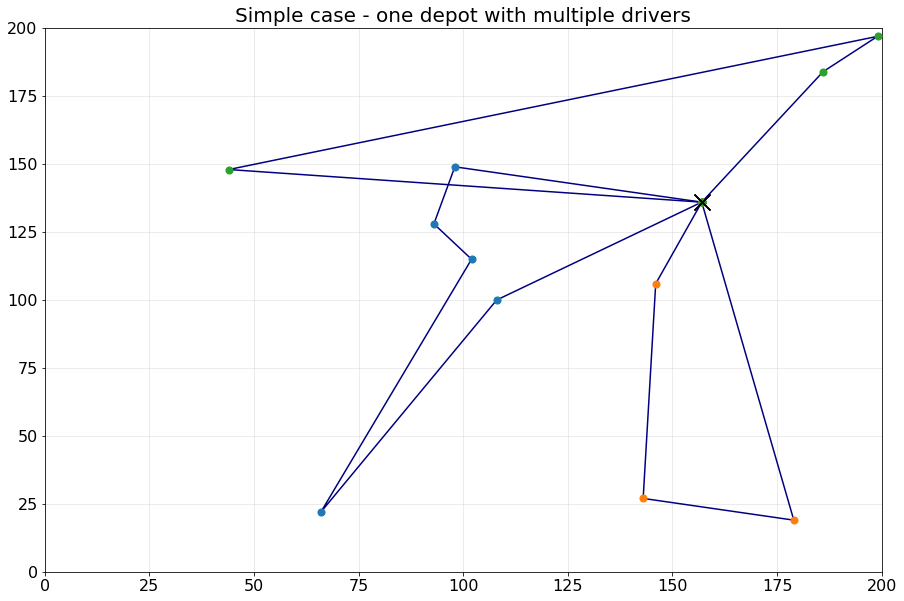

In [8]:
plot_routes(routes_data, 'Simple case - one depot with multiple drivers')

## Second Example: Multiple start points, even distribution of work

In this example, each crew starts from a different place, and all crews must perform the same number of repairs/jobs/callouts.

In [ ]:
engineers = 3
jobs = 12
time_limit = 10
call_locations = data_generator(jobs,200,200)
distance_matrix = distance_finder(call_locations)